# ANÁLISE EXPLORATÓRIA DOS DADOS DE VENDAS

## Objetivo do Projeto

O projeto tem como objetivo explorar e aprimorar habilidades de análise exploratória de dados em um conjunto de dados de vendas, transformando informações brutas em insights valiosos. Este projeto desafia a capacidade de interpretar dados, identificar padrões e tendências, além de fornecer uma base sólida para tomadas de decisão estratégicas.

### Habilidades Trabalhadas

- Importação e manipulação de arquivos CSV.  
- Concatenação de DataFrames utilizando `pd.concat()`.  
- Remoção de valores nulos e filtragem de linhas com base em condições específicas.  
- Alteração de tipos de dados das colunas com `to_numeric` e `to_datetime`.
- Manipulação de dados no formato datetime.
- Adição de novas colunas ao DataFrame.  
- Criação e utilização de funções personalizadas.
- Aplicação de métodos como `.apply()` e funções `lambda` para transformações nos dados.  
- Realização de análises agregadas com o uso do `groupby`.
- Relacionamento entre colunas com `pd.crosstab()`
- Interpretação de tabelas e gráficos
- Plotagem de gráficos informativos com as bibliotecas **matplotlib** e **seaborn**.  

### Iremos explorar 8 questões de alto nível relacionadas a base de dados de vendas:

1. [Qual foi o melhor mês para vendas? Quanto foi ganho naquele mês?](#pergunta1)
2. [O que aconteceu entre os meses de Setembro e Outubro? Por que o mês de Janeiro de 2020 teve uma receita tão baixa?](#pergunta2)
3. [Qual cidade teve a maior receita de vendas?](#pergunta3)
4. [Quais são os cinco produtos mais vendidos por cidade e quais geram mais receita?](#pergunta4)
5. [Em que horário devemos exibir anúncios para maximizar a probabilidade de compra dos clientes?](#pergunta5)
6. [Quais produtos são vendidos com mais frequência juntos?](#pergunta6)
7. [Qual produto vendeu mais? Por que você acha que ele vendeu mais?](#pergunta7)
8. [Quais os melhores e piores produtos? Por quê?](#pergunta8)

**___________________________________________________________________________________________________________________________**
<a id='importacao'></a>

# IMPORTAÇÃO

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Importando a base de dados
- Para importar a base de dados, precisamos unir os arquivos de todos os meses de venda de 2019 em um único arquivo CSV.

In [2]:
# Cria uma lista chamada 'files' e armazena todos os nomes dos arquivos da pasta "Sales_Data" 
files = [file for file in os.listdir('./Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
# Cria um dataframe vazio para armazenar todos os meses de 2019
data_sales_2019 = pd.DataFrame()

# Percorre cada arquivo um por um
for file in files:
    # Importa o arquivo
    df_month = pd.read_csv('./Sales_Data/' + file)
    
    # Faz a concatenação
    data_sales_2019 = pd.concat([data_sales_2019, df_month])

# Exporta o dataframe para um novo arquivo CSV com todos os 12 meses de 2019
data_sales_2019.to_csv('data_sales_2019.csv', index=False)

In [4]:
# Importando o arquivo CSV com todos os meses de 2019
df_sales = pd.read_csv('data_sales_2019.csv')
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [5]:
# Informações da nossa base
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186849 entries, 0 to 186848
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


**___________________________________________________________________________________________________________________________**
<a id='limpeza'></a>

# LIMPEZA DOS DADOS

## Removendo valores nulos

In [6]:
# Analisando a quantidade de valores nulos
df_sales.isnull().sum()

Order ID            544
Product             544
Quantity Ordered    544
Price Each          544
Order Date          544
Purchase Address    544
dtype: int64

In [7]:
# Visualizando as linhas com valores nulos
df_sales[df_sales.isnull().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
355,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1432,NaN,NaN,NaN,NaN,NaN,NaN
1552,NaN,NaN,NaN,NaN,NaN,NaN
1570,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185175,NaN,NaN,NaN,NaN,NaN,NaN
185437,NaN,NaN,NaN,NaN,NaN,NaN
186041,NaN,NaN,NaN,NaN,NaN,NaN
186547,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Removendo as linhas com valores nulos
df_sales.dropna(how='all', inplace=True)

In [9]:
# Perceba agora que não temos mais valores nulos
df_sales.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

## Removendo as linhas que contém o cabeçalho

In [10]:
# Perceba que algumas linhas do dataframe estão incorretas, elas representam o cabeçalho. 
# Provavelmente foi um erro durante a nossa importação, com isso precisamos corrigir a base eliminando estas linhas
df_sales[df_sales['Order Date'] == 'Order Date']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
518,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1148,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1154,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2877,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2892,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185163,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185550,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186562,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186631,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [11]:
# Seleciona as linhas com valores diferentes de 'Order Date' e armazena o resultado no próprio dataframe
df_sales = df_sales[df_sales['Order Date'] != 'Order Date']

## Convertendo as colunas para o tipo correto

In [12]:
# Analisando o tipo de variável de cada coluna
df_sales.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [13]:
# Convertendo as colunas para o tipo correto
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date']) # Tipo data e hora
df_sales['Quantity Ordered'] = pd.to_numeric(df_sales['Quantity Ordered']) # Tipo numérico
df_sales['Price Each'] = pd.to_numeric(df_sales['Price Each']) # Tipo numérico

C:\Users\Douglas\AppData\Local\Temp\ipykernel_13548\2567915816.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date']) # Tipo data e hora


In [14]:
# Observe que o tipo das colunas foram alteradas
df_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

**___________________________________________________________________________________________________________________________**
<a id='analise'></a>

# ANÁLISE EXPLORATÓRIA

<a id='pergunta1'></a>

## Pergunta 1: Qual foi o melhor mês para vendas? Quanto foi ganho naquele mês?
- Antes de reponder a esta pergunta, precisamos fazer alguns tratamentos

In [15]:
# Analisando o dataframe inicial
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


**Adicionando a coluna mês**
- Com a coluna 'Order Date' transformada para o tipo datetime, podemos facilmente obter o mês da seguinte forma

In [16]:
# Obtendo o mês e ano de cada registro e armazenando os valores em novas colunas 'Month' e 'Year'
df_sales['Month'] = df_sales['Order Date'].dt.month
df_sales['Year'] = df_sales['Order Date'].dt.year

In [17]:
# Observe que as novas colunas foram criadas
df_sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019


In [18]:
# Todos os valores únicos da coluna Month
sorted(df_sales['Month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [19]:
# Todos os valores únicos da coluna Year
sorted(df_sales['Year'].unique())

[2019, 2020]

- Perceba que temos um erro na nossa base de dados, alguns registos do ano de 2020 também foram importados.
- Vamos remover todos os registros de 2020

In [20]:
# Quantidade de registros de 2020
df_sales[df_sales['Year']==2020].shape

(34, 8)

In [21]:
# Selecionando apenas o ano de 2019
df_sales = df_sales[df_sales['Year']==2019]

In [22]:
# Quantidade de registros final
df_sales.shape

(185916, 8)

**Adicionando a coluna Sales**
- A coluna Sales é a quantidade de pedidos vezes o preço de cada produto

In [23]:
# Cria uma nova coluna e armazena o resultado da multiplicação
df_sales['Sales'] = df_sales['Quantity Ordered'] * df_sales['Price Each']

In [24]:
# Visualiza o dataframe
df_sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00


**Respondendo a pergunta**

In [25]:
# Define as data como sendo o index
df_date = df_sales.set_index('Order Date')
df_date.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,Month,Year,Sales
Order Date,,,,,,,,
2019-04-19 08:46:00,176558,USB-C Charging Cable,2,11.95,"917 1st St, Dallas, TX 75001",4,2019,23.90
2019-04-07 22:30:00,176559,Bose SoundSport Headphones,1,99.99,"682 Chestnut St, Boston, MA 02215",4,2019,99.99


In [26]:
# Receita total da vendas por mês
monthly_revenue = df_date['Sales'].resample('M').sum()
monthly_revenue

Order Date
2019-01-31    1813586.44
2019-02-28    2202022.42
2019-03-31    2807100.38
2019-04-30    3390670.24
2019-05-31    3152606.75
2019-06-30    2577802.26
2019-07-31    2647775.76
2019-08-31    2244467.88
2019-09-30    2097560.13
2019-10-31    3736726.88
2019-11-30    3199603.20
2019-12-31    4613443.34
Freq: M, Name: Sales, dtype: float64

- **`.resample('M')`** agrupa os dados da coluna selecionada em períodos mensais. 
- **`O argumento `'M'`** indica que queremos reagrupar os dados por mês. Isso é útil, por exemplo, quando você tem dados em diferentes dias e quer agregá-los por mês.
- **`.sum()`** por fim, esse método soma todos os valores de 'Sales' que pertencem ao mesmo mês. Assim, você obtém a receita total para cada mês.

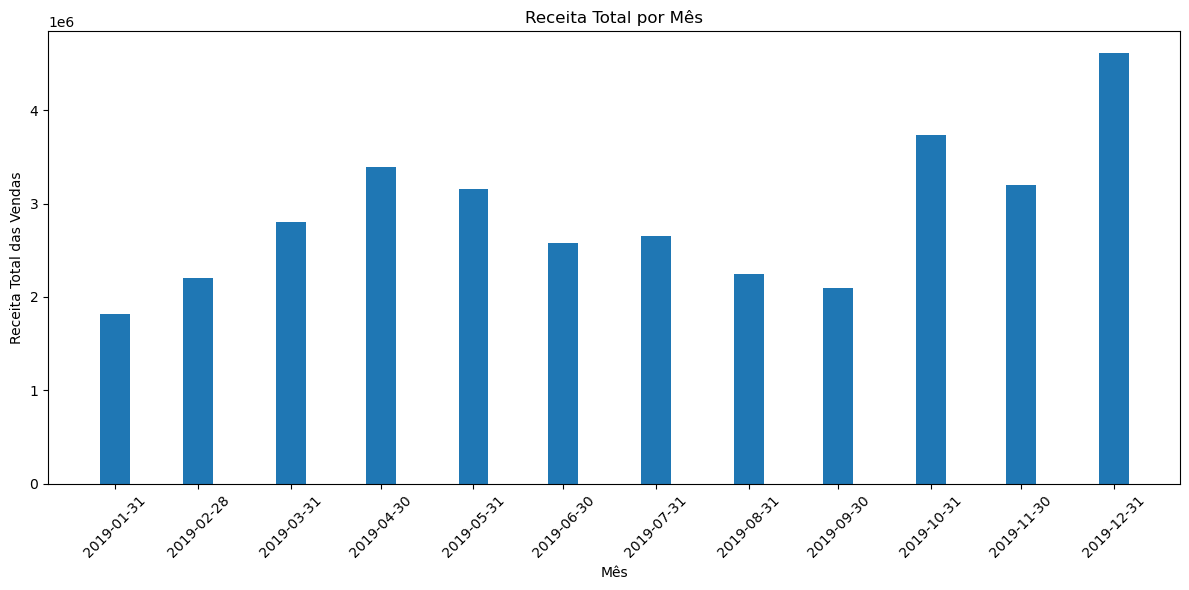

In [27]:
# Agora, vamos visualizar a tabela acima em um gráfico para facilitar a análise
plt.figure(figsize=(12, 6))

plt.bar(monthly_revenue.index, height=monthly_revenue, width=10)

plt.xticks(monthly_revenue.index, rotation=45)
plt.ylabel('Receita Total das Vendas')
plt.xlabel('Mês')
plt.title('Receita Total por Mês')
plt.tight_layout()

plt.show()

- **Resposta:** 

    - A receita total parece ter um crescimento contínuo ao longo de 2019, com exceção de algumas flutuações. 
    - O mês de março (2,807,100.38) e abril (3,390,670.24) mostram um aumento significativo, indicando um potencial crescimento nas vendas ou um novo impulso nas operações.
    - O melhor mês para vendas foi em dezembro com um pico de 4,613,443.34. Isso pode ser atribuído a compras típicas de fim de ano, como o Natal.
    - Em contrapartida, janeiro apresentou a menor receita do ano com 1,813,586.44. 

<a id='pergunta2'></a>

## Pergunta 2: O que aconteceu entre os meses de Setembro e Outubro?

In [28]:
# Selecionando apenas o mês 9 (Setembro) e 10 (Outubro)
set_out_month = df_date[(df_date['Month']==10) | (df_date['Month']==9)]

In [29]:
# Agrupa a quantidade de vendas por dia entre os meses de setembro e outubro e soma
set_out_sales = set_out_month['Quantity Ordered'].resample('D').sum()

# Agrupa a receita de vendas por dia entre os meses de setembro e outubro e soma
set_out_revenue = set_out_month['Sales'].resample('D').sum()

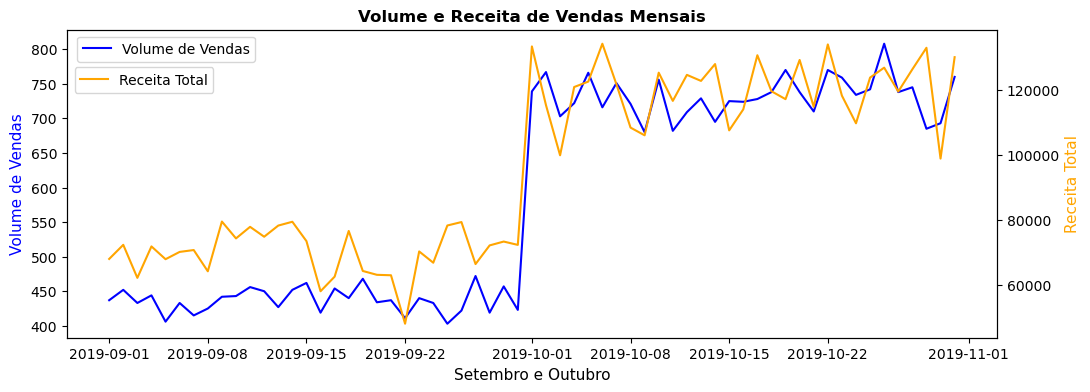

In [30]:
# Plotando um gráfico que informa o Volume de Vendas e a Receita Total de cada produto por dia entre os meses de Setembro e Outubro
fig, ax1 = plt.subplots(figsize=(12,4))
ax2 = ax1.twinx()

ax1.plot(set_out_sales, label='Volume de Vendas', color='blue')
ax1.set_ylabel("Volume de Vendas", fontsize=11, color='blue')
ax1.set_xlabel("Setembro e Outubro", fontsize=11)

ax2.plot(set_out_revenue, label='Receita Total', color='orange')
ax2.set_ylabel("Receita Total", fontsize=11, color='orange')

plt.title("Volume e Receita de Vendas Mensais", fontsize=12, weight='bold')

ax1.legend(bbox_to_anchor=(0.21, 0.5, 0., 0.5))
ax2.legend(bbox_to_anchor=(0.165, 0.4, 0., 0.5))

plt.show()

In [31]:
# Média da quantidade de pedidos por mês
set_out_month.groupby('Month')['Quantity Ordered'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Month,,,
9,11621,13109,1.128044
10,20282,22703,1.119367


In [32]:
# Média das receitas por mês
set_out_month.groupby('Month')['Sales'].agg(['count', 'sum', 'mean'])

,count,sum,mean
Month,,,
9,11621,2097560.13,180.497387
10,20282,3736726.88,184.238580


In [33]:
# Agrupando por mês e por produto e somando a quantidade de pedidos
df_set_out_grouped = set_out_month.groupby(['Month', 'Product'])['Quantity Ordered'].agg(['sum'])
df_set_out_grouped

sum
Month Product                         
9     20in Monitor                 277
      27in 4K Gaming Monitor       381
      27in FHD Monitor             483
      34in Ultrawide Monitor       379
      AA Batteries (4-pack)       1771
      AAA Batteries (4-pack)      1923
      Apple Airpods Headphones     969
      Bose SoundSport Headphones   828
      Flatscreen TV                294
      Google Phone                 341
      LG Dryer                      30
      LG Washing Machine            46
      Lightning Charging Cable    1432
      Macbook Pro Laptop           288
      ThinkPad Laptop              249
      USB-C Charging Cable        1594
      Vareebadd Phone              126
      Wired Headphones            1301
      iPhone                       397
10    20in Monitor                 429
      27in 4K Gaming Monitor       723
      27in FHD Monitor             791
      34in Ultrawide Monitor       671
      AA Batteries (4-pack)       2940
      AAA Batteries (4-pack)      3363
      Apple Airpods Headphones    1671
      Bose SoundSport Headphones  1465
      Flatscreen TV                524
      Google Phone                 597
      LG Dryer                      50
      LG Washing Machine            61
      Lightning Charging Cable    2572
      Macbook Pro Laptop           525
      ThinkPad Laptop              461
      USB-C Charging Cable        2667
      Vareebadd Phone              203
      Wired Headphones            2274
      iPhone                       716

- Para facilitar a visualização e comparação dos meses na tabela acima, vamos criar um dataframe onde as linhas são os produtos e as colunas repesentam os meses

In [34]:
# Cria um dataframe vazio
df_set_out = pd.DataFrame(index=df_set_out_grouped.reset_index()['Product'].unique(), columns=['September', 'October'])

# Adiciona os valores de Setembro
df_set_out['September'] = df_set_out_grouped.xs(9)

# Adiciona os valores de Outubro
df_set_out['October'] = df_set_out_grouped.xs(10)

# Calcula o crescimento percentual
df_set_out['Percentage Growth'] = ((df_set_out['October'] - df_set_out['September'])/df_set_out['September'])*100

# Adiciona o preço unitário do produto
df_set_out['Price Each'] = set_out_month.groupby('Product')['Price Each'].mean()

# Ordena o dataframe por ordem decrescente de acordo com o crescimento percentual
df_set_out.sort_values('Percentage Growth', ascending=False)

,September,October,Percentage Growth,Price Each
27in 4K Gaming Monitor,381,723,89.763780,389.99
ThinkPad Laptop,249,461,85.140562,999.99
Macbook Pro Laptop,288,525,82.291667,1700.00
iPhone,397,716,80.352645,700.00
Lightning Charging Cable,1432,2572,79.608939,14.95
Flatscreen TV,294,524,78.231293,300.00
34in Ultrawide Monitor,379,671,77.044855,379.99
Bose SoundSport Headphones,828,1465,76.932367,99.99
Google Phone,341,597,75.073314,600.00
AAA Batteries (4-pack),1923,3363,74.882995,2.99


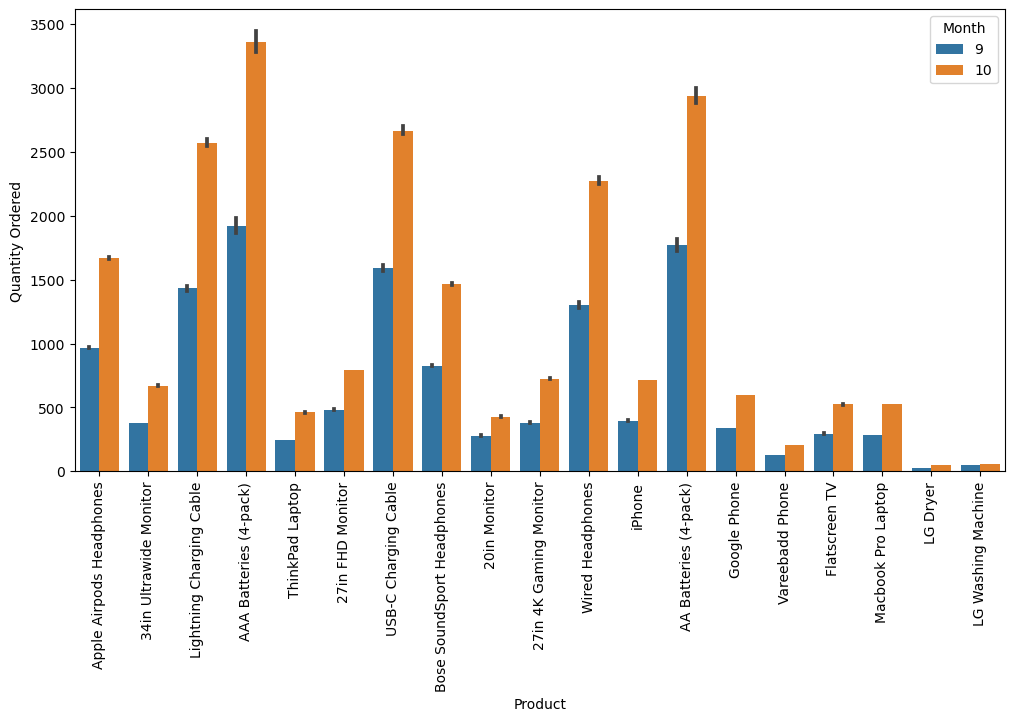

In [35]:
# Gráfico que compara a quantidade de pedidos por produtos entre o mes de setembro e outubro
plt.figure(figsize=(12, 6))
sns.barplot(data=set_out_month, x='Product', y='Quantity Ordered', hue='Month', estimator='sum')
plt.xticks(rotation=90)
plt.show()

- **Resposta:**
    - O percentual de crescimento varia amplamente entre os produtos, com destaque para o **27in 4K Gaming Monitor**, que teve um crescimento de 89,76%, indicando uma alta demanda ou efetividade em promoções.
     - Outros produtos, como o **ThinkPad Laptop** e o **Lightning Charging Cable**, também mostraram crescimento robusto (85,14% e 79,61%, respectivamente).
     - O **LG Washing Machine** teve o menor crescimento percentual, de apenas 32,61%, o que pode indicar uma venda consistente, mas sem grande aumento de demanda.
    - A coluna de "Preço" revela que os produtos com maior crescimento, como o **27in 4K Gaming Monitor** e o **Macbook Pro Laptop**, também possuem preços mais altos, sugerindo que o aumento nas vendas pode ser devido à priorização de eletrônicos premium.
    - Para os itens que apresentaram baixo crescimento, considerar campanhas promocionais ou marketing direcionado pode aumentar a demanda.
    - Avaliar se as vendas aumentaram devido a eventos sazonais em outubro pode fornecer insights para estratégias futuras.
    - Focar no público-alvo para produtos de alta gama pode aumentar as vendas de itens de maior valor e, consequentemente, melhorar a margem de lucro.


<a id='pergunta3'></a>

## Pergunta 3: Qual cidade teve a maior receita de vendas?

In [36]:
# Visualiza o dataframe
df_sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00


**Adiciona a coluna City**

- Observe no dataframe acima que temos uma coluna chamada 'Purchase Address'. Precisamos pegar apenas a cidade do endereço e armazenar este valor em uma nova coluna chamada 'City'.

In [37]:
# Para isso, vamos criar duas funções. 

def get_city(city): # função para pegar a cidade
    return city.split(',')[1].strip()
    # .split(',')[1] ---> quebra o texto pelo caracter (,) e armazena as partes em uma lista. [1] Seleciona o índice 1.
    # .strip() ---> esta função remove os espaços em branco

def get_state(state): # função para pegar o estado
    return state.split(',')[2].strip()[:2]

In [38]:
# Vamos aplicar estas funções em cada linha da coluna 'Purchase Address' e armazenar o retorno em uma nova coluna 'City'
df_sales['City'] = df_sales['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

In [39]:
# Vamos visualizar a alteração
df_sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA)


**Respondendo a pergunta**

In [40]:
# Agrupa pela cidade, pega a valor das vendas e faz uma contagem, soma e média
results_city = df_sales.groupby('City')['Sales'].agg(['count', 'sum', 'mean'])
results_city

,count,sum,mean
City,,,
Atlanta (GA),14881,2795498.58,187.856903
Austin (TX),9903,1819081.77,183.689970
Boston (MA),19930,3660315.12,183.658561
Dallas (TX),14818,2766260.45,186.682444
Los Angeles (CA),29604,5451570.81,184.149804
New York City (NY),24866,4662976.81,187.524202
Portland (ME),2455,449758.27,183.200925
Portland (OR),10008,1870579.35,186.908408
San Francisco (CA),44720,8259719.03,184.698547


In [41]:
# Estatística descritiva
df_sales.groupby('City')['Sales'].describe()

,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Atlanta (GA),14881.0,187.856903,334.718438,2.99,11.95,14.95,150.0,1700.0
Austin (TX),9903.0,183.689970,331.448589,2.99,11.95,14.95,150.0,1700.0
Boston (MA),19930.0,183.658561,329.147548,2.99,11.95,14.95,150.0,3400.0
Dallas (TX),14818.0,186.682444,334.258534,2.99,11.95,14.95,150.0,1700.0
Los Angeles (CA),29604.0,184.149804,332.182436,2.99,11.95,14.95,150.0,1700.0
New York City (NY),24866.0,187.524202,336.252669,2.99,11.95,14.95,150.0,3400.0
Portland (ME),2455.0,183.200925,330.590651,2.99,11.95,14.95,150.0,1700.0
Portland (OR),10008.0,186.908408,338.562596,2.99,11.95,14.95,150.0,1700.0
San Francisco (CA),44720.0,184.698547,332.591563,2.99,11.95,14.95,150.0,3400.0


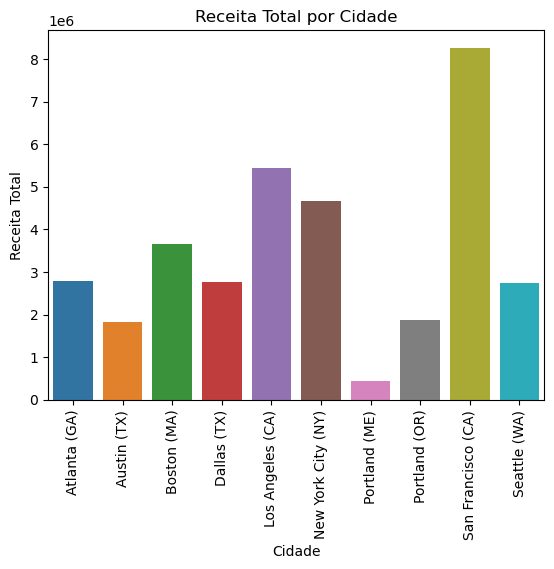

In [42]:
# Visualização do total de vendas por cidade
sns.barplot(data=results_city, x=results_city.index, y='sum')
plt.xticks(rotation='vertical')
plt.ylabel('Receita Total')
plt.xlabel('Cidade')
plt.title('Receita Total por Cidade')
plt.show()

- **Resposta:** A cidade que teve a maior receita de vendas foi San Francisco (CA). A menor receita foi Portland (ME)

<a id='pergunta4'></a>

## Pergunta 4: Quais são os cinco produtos mais vendidos por cidade e quais geram mais receita?

### Produtos mais vendidos por cidade

O gráfico de calor abaixo ajuda a analisar a relação entre produtos e cidades.

<Axes: xlabel='City', ylabel='Product'>

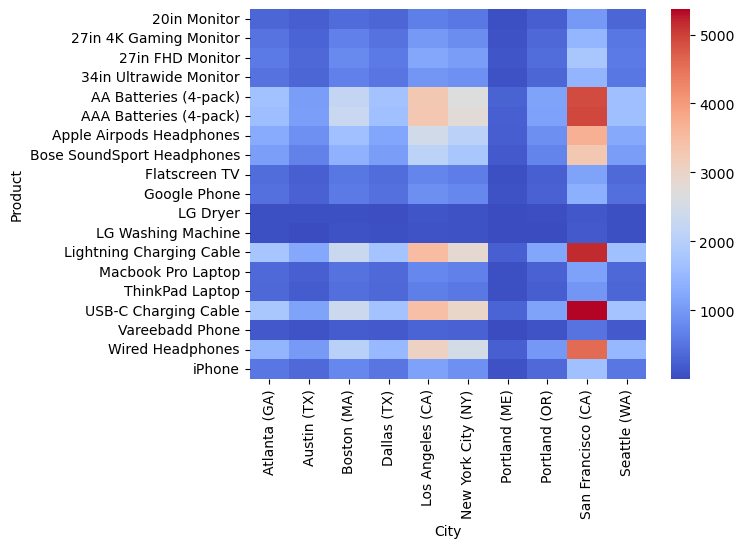

In [43]:
# Cria um gráfico de calor da tabela cruzada que conta a frequência dos produtos vendidos em cada cidade.
sns.heatmap(pd.crosstab(df_sales['Product'], df_sales['City']), cmap='coolwarm')

In [44]:
# Lista de todas as cidades
cities = df_sales['City'].unique()
cities

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [45]:
# O looping abaixo basicamente irá imprimir os cinco produtos mais vendidos de cada cidade
for city in cities:
    print(f'##### {city} #####')
    df_city = df_sales.groupby(['City', 'Product'])['Quantity Ordered'].agg(['count', 'sum', 'mean']).xs(city).sort_values('sum', ascending=False).head()
    print(f'{df_city}\n')

##### Dallas (TX) #####
                          count   sum      mean
Product                                        
AAA Batteries (4-pack)     1650  2504  1.517576
AA Batteries (4-pack)      1693  2261  1.335499
Lightning Charging Cable   1719  1863  1.083770
USB-C Charging Cable       1691  1852  1.095210
Wired Headphones           1515  1669  1.101650

##### Boston (MA) #####
                          count   sum      mean
Product                                        
AAA Batteries (4-pack)     2301  3461  1.504129
AA Batteries (4-pack)      2215  3016  1.361625
USB-C Charging Cable       2332  2560  1.097770
Lightning Charging Cable   2322  2490  1.072351
Wired Headphones           2025  2222  1.097284

##### Los Angeles (CA) #####
                          count   sum      mean
Product                                        
AAA Batteries (4-pack)     3313  4967  1.499245
AA Batteries (4-pack)      3289  4438  1.349346
USB-C Charging Cable       3454  3782  1.094962
Lightning

### Produtos com as maiores receitas por cidade

O gráfico de calor abaixo ajuda a analisar a relação entre receita total dos produtos e cidades.

<Axes: xlabel='City', ylabel='Product'>

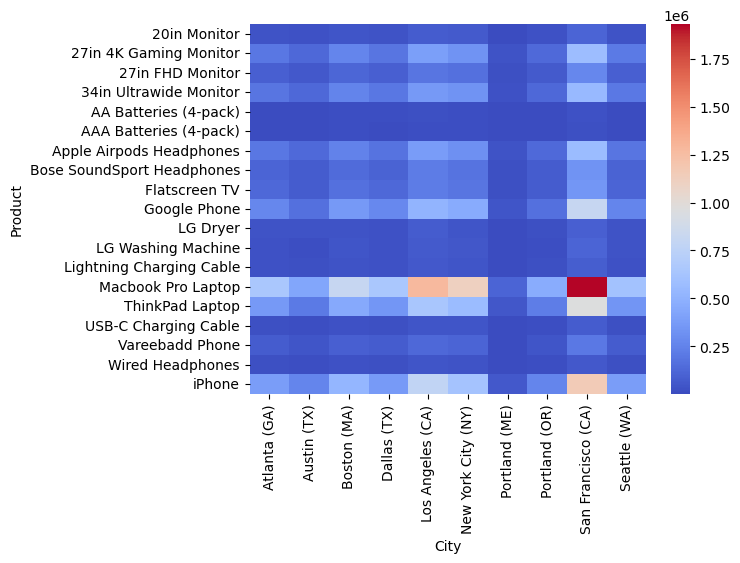

In [46]:
# Gera um mapa de calor que mostra a soma das vendas de produtos em diferentes cidades, facilitando a identificação de 
# quais combinações de produto e cidade têm vendas mais altas ou mais baixas.
sns.heatmap(pd.crosstab(df_sales['Product'], df_sales['City'], df_sales['Sales'], aggfunc='sum'), cmap='coolwarm')

In [47]:
# Lista de todas as cidades
cities = df_sales['City'].unique()
cities

array(['Dallas (TX)', 'Boston (MA)', 'Los Angeles (CA)',
       'San Francisco (CA)', 'Seattle (WA)', 'Atlanta (GA)',
       'New York City (NY)', 'Portland (OR)', 'Austin (TX)',
       'Portland (ME)'], dtype=object)

In [48]:
# O looping abaixo basicamente irá imprimir os cinco produtos com as maiores receitas de cada cidade
for city in cities:
    print(f'##### {city} #####')
    df_city = df_sales.groupby(['City', 'Product'])['Sales'].agg(['count', 'sum', 'mean']).xs(city).sort_values('sum', ascending=False).head()
    print(f'{df_city}\n')

##### Dallas (TX) #####
                        count        sum        mean
Product                                             
Macbook Pro Laptop        381  647700.00  1700.00000
iPhone                    519  363300.00   700.00000
ThinkPad Laptop           345  344996.55   999.99000
Google Phone              461  276600.00   600.00000
34in Ultrawide Monitor    511  194554.88   380.73362

##### Boston (MA) #####
                        count        sum         mean
Product                                              
Macbook Pro Laptop        478  814300.00  1703.556485
iPhone                    752  527100.00   700.930851
ThinkPad Laptop           445  445995.54  1002.237169
Google Phone              592  355800.00   601.013514
27in 4K Gaming Monitor    673  263243.25   391.148960

##### Los Angeles (CA) #####
                        count         sum         mean
Product                                               
Macbook Pro Laptop        751  1276700.00  1700.000000
iPhone 

- Identificando os produtos mais vendidos e aqueles que geram as maiores receitas por cidade, ajuda a direcionar melhor as campanhas promocionais e o marketing.

<a id='pergunta5'></a>

## Pergunta 5: Em que horário devemos exibir anúncios para maximizar a probabilidade de compra dos clientes?

In [49]:
# Visualizando o dataframe
df_sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA)


**Adicionando as colunas hora e minuto**
- Observe que temos uma coluna chamada 'Order Date' com a data e hora da compra. Como esta coluna foi transformada para o tipo datetime, fica fácil retirar informações do horário da comprar

In [50]:
 # Observe que a coluna 'Purchase Address' é do tipo datetime
df_sales.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Year                         int32
Sales                      float64
City                        object
dtype: object

In [51]:
# Com este tipo de variável, podemos retirar valores de data e hora utilizando os seguinte métodos
print('data e hora: ', df_sales['Order Date'][0])
print('data: ', df_sales['Order Date'][0].date())
print('dia: ', df_sales['Order Date'][0].day)
print('mês: ', df_sales['Order Date'][0].month)
print('ano: ', df_sales['Order Date'][0].year)
print('hora: ', df_sales['Order Date'][0].hour)
print('minuto: ', df_sales['Order Date'][0].minute)

data e hora:  2019-04-19 08:46:00
data:  2019-04-19
dia:  19
mês:  4
ano:  2019
hora:  8
minuto:  46


- Vamos criar duas novas colunas que armazenarão os valores das horas e minutos das compras

In [52]:
# Cria a coluna e armazena o valor
df_sales['Hour'] = df_sales['Order Date'].dt.hour
df_sales['Minute'] = df_sales['Order Date'].dt.minute

In [53]:
# Visualizando a base
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),9,27


**Respondendo a pergunta**

In [54]:
# Quantidade de pedidos por hora
hour_sales = df_sales.groupby('Hour')['Quantity Ordered'].count()
hour_sales

Hour
0      3898
1      2341
2      1239
3       828
4       850
5      1319
6      2482
7      4011
8      6256
9      8748
10    10944
11    12411
12    12587
13    12129
14    10984
15    10175
16    10384
17    10899
18    12280
19    12905
20    12228
21    10921
22     8822
23     6275
Name: Quantity Ordered, dtype: int64

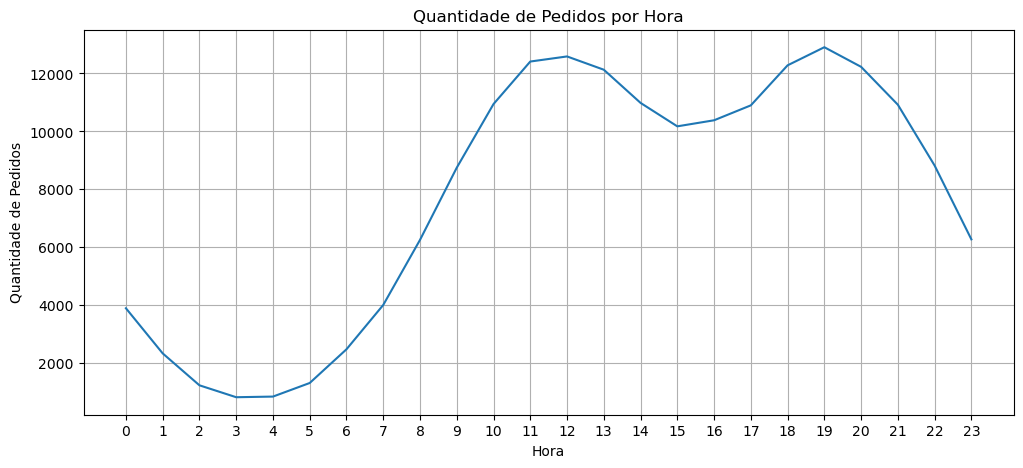

In [55]:
# Visualizando em formato de gráfico de linhas
plt.figure(figsize=(12, 5))

hour_sales.plot()

plt.xticks(range(0, 24))
plt.ylabel('Quantidade de Pedidos')
plt.xlabel('Hora')
plt.title('Quantidade de Pedidos por Hora')
plt.grid()
plt.show()

- **Resposta:** 

    - Observa-se um pico significativo na quantidade de pedidos entre as 11h e 12h, atingindo mais de 12,000 pedidos. Isso sugere que esse período é bem movimentado, possivelmente devido a promoções, lançamentos de produtos ou hábitos de compra dos consumidores.

    - Após o pico da manhã, a quantidade de pedidos se estabiliza em torno de 10,000 a 12,000 pedidos entre 13h e 18h, indicando um fluxo constante de compras durante a tarde.

    - Observe-se um novo pico de vendas entre as 18h e 19h, superando o pico observado às 12h. Isso pode ser atribuído ao fim do expediente, quando as pessoas estão em casa após o trabalho, resultando em um aumento no número de usuários conectados à internet.

    - À noite, a quantidade de pedidos diminui gradualmente atingindo a menor quantidade de pedidos entre 0h e 5h, com valores abaixo de 2,500. Isso é esperado, pois a maioria das pessoas estão dormindo durante estes horários.

    - O gráfico sugere que a empresa deve focar suas estratégias de marketing e promoções durante as horas de pico (11h ~ 12h e 18h ~ 19h) para maximizar a probabilidade de compra dos clientes.

<a id='pergunta6'></a>

## Pergunta 6: Quais produtos são vendidos com mais frequência juntos?

In [56]:
# Exibe o dataframe
df_sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),14,38
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),9,27


In [57]:
# Observe que o ID = 160873 aparece 5 vezes
df_sales['Order ID'].describe()

count     185916
unique    178406
top       160873
freq           5
Name: Order ID, dtype: object

In [58]:
# Analisando o pedido 160873
df_sales[df_sales['Order ID'] == '160873']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
66346,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,2019,700.00,San Francisco (CA),10,24
66347,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,2019,14.95,San Francisco (CA),10,24
66348,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,2019,150.00,San Francisco (CA),10,24
66349,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,2019,11.99,San Francisco (CA),10,24
66350,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,2019,600.00,San Francisco (CA),10,24


- Observe que em um único pedido (160873) foi realizado a compra de cinco produtos
- Para responder a esta pergunta precisamos pegar o ID dos pedidos duplicados, pois se o ID é duplicado significa que mais de um produto foi comprado pelo cliente.

In [59]:
# Seleciona os valores duplicados e mantém todos os valores. Armazena o resultado em um novo dataframe 
df_duplicated = df_sales[df_sales['Order ID'].duplicated(keep=False)]

df_duplicated.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),14,38
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),14,38
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),19,42
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2019,11.95,Los Angeles (CA),19,42
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,2019,99.99,Boston (MA),11,31
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,2019,99.99,Boston (MA),11,31
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,2019,5.98,San Francisco (CA),17,0
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,2019,600.00,San Francisco (CA),17,0
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,2019,14.95,New York City (NY),11,7
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,2019,11.95,New York City (NY),11,7


- Observe no dataframe gerado acima que temos ID duplicados, ou seja, clientes que compraram mais de um produto

In [60]:
# Abaixo, estamos basicamente unindo os produtos que foram comprados pelo mesmo cliente
df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

C:\Users\Douglas\AppData\Local\Temp\ipykernel_13548\1002246961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicated['Grouped'] = df_duplicated.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [61]:
# Observe que na coluna Grouped temos todos os produtos que foram comprados pelo cliente
df_duplicated.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,2019,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,2019,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,2019,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,2019,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
32,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,2019,600.00,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
118,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,2019,14.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"
119,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,2019,11.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [62]:
# Elimina os valores duplicados
df_duplicated = df_duplicated[['Order ID', 'Grouped']].drop_duplicates()

df_duplicated.head(10)

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
128,176681,"Apple Airpods Headphones,ThinkPad Laptop"
137,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
188,176739,"34in Ultrawide Monitor,Google Phone"
224,176774,"Lightning Charging Cable,USB-C Charging Cable"
232,176781,"iPhone,Lightning Charging Cable"


In [63]:
# Importa as bibliotecas
from itertools import combinations
from collections import Counter

- Agora que temos um dataframe com todos os produtos que foram comprados juntos, podemos fazer algumas combinações e contar qual combinação é mais frequente

In [64]:
# cria uma instância da classe Counter
count = Counter()

# percorre cada linha da coluna 'Grouped'
for row in df_duplicated['Grouped']:
    
    # divide os elementos da linha pela vírgula e armazena os valores em uma lista
    row_list = row.split(',')
    
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1004
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 359
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


- **`combinations(row_list, 2)`**: Esta função cria todas as combinações possíveis de dois elementos distintos a partir da lista `row_list`.

- **`Counter(...)`**: Conta a ocorrência de elementos. Ao passar as combinações geradas como argumento para `Counter`, ele cria um dicionário onde as chaves são os pares formados (as combinações) e os valores são a quantidade de vezes que cada par aparece.

- **`count.update(...)`**: O método `update()` é usado para adicionar contagens de outro `Counter`. Neste caso, ele está adicionando as contagens das combinações geradas ao `Counter` existente chamado `count`.

Resumindo, essa linha de código acima calcula todas as combinações de dois elementos de uma lista (`row_list`), conta quantas vezes cada combinação ocorre e atualiza um contador existente (`count`) com esses valores. 

- **Resposta:** Abaixo estão os produtos que costumam ser vendidos juntos com mais frequência. Podemos utilizar essas informações para criar promoções que combinem esses itens:

    - ('iPhone', 'Lightning Charging Cable') - 1004
    - ('Google Phone', 'USB-C Charging Cable') - 987
    - ('iPhone', 'Wired Headphones') - 447
    - ('Google Phone', 'Wired Headphones') - 414


<a id='pergunta7'></a>

## Pergunta 7: Qual produto vendeu mais? Por que você acha que ele vendeu mais?

In [65]:
# Exibe o dataframe
df_sales.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,2019,23.90,Dallas (TX),8,46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,2019,99.99,Boston (MA),22,30
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,2019,600.00,Los Angeles (CA),14,38


In [66]:
# Agrupa por produto e então é realizado a soma da quantidade e da receita
df_qnt_sales = df_sales.groupby('Product')[['Quantity Ordered', 'Sales']].sum()

In [67]:
# Preço de cada produto
df_price = df_sales.groupby('Product')['Price Each'].mean() 

In [68]:
# Concatenando os dois dataframes criados acima
df_product = pd.concat([df_qnt_sales, df_price], axis=1)
df_product.sort_values('Sales', ascending=False)

,Quantity Ordered,Sales,Price Each
Product,,,
Macbook Pro Laptop,4727,8035900.00,1700.00
iPhone,6847,4792900.00,700.00
ThinkPad Laptop,4128,4127958.72,999.99
Google Phone,5531,3318600.00,600.00
27in 4K Gaming Monitor,6243,2434707.57,389.99
34in Ultrawide Monitor,6199,2355558.01,379.99
Apple Airpods Headphones,15657,2348550.00,150.00
Flatscreen TV,4818,1445400.00,300.00
Bose SoundSport Headphones,13454,1345265.46,99.99


C:\Users\Douglas\AppData\Local\Temp\ipykernel_13548\351464761.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_quantity.index, rotation='vertical', size=8)


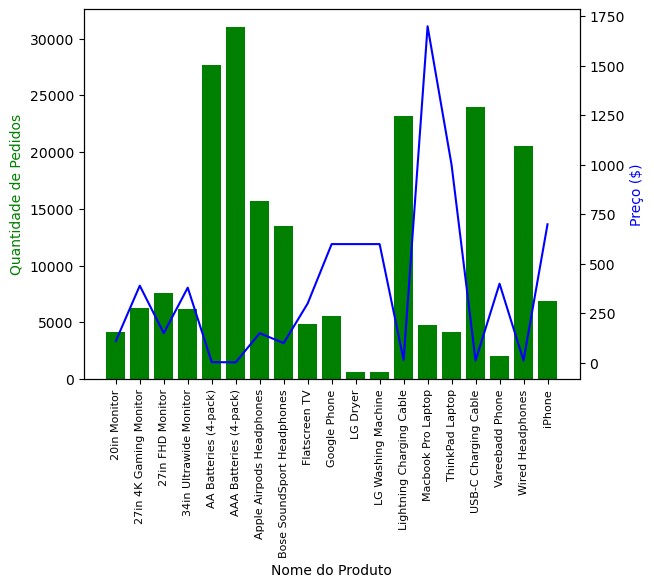

In [69]:
# Preço de cada produto
prices = df_sales.groupby('Product')['Price Each'].mean()

# Soma da quantidade de pedidos por produtos
product_quantity = df_sales.groupby('Product')['Quantity Ordered'].sum()

# Plotando um gráfico que informa a quantidade de pedidos por produtos e o preço de cada produto
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(product_quantity.index, product_quantity, color='g')
ax2.plot(prices.index, prices, 'b-')

ax1.set_xlabel('Nome do Produto')
ax1.set_ylabel('Quantidade de Pedidos', color='g')
ax1.set_xticklabels(product_quantity.index, rotation='vertical', size=8)

ax2.set_ylabel('Preço ($)', color='b')

plt.show()

- **Resposta:** O produto que mais vendeu foi o 'AAA BAtteries(4-pack)'. É possível que ele tenha sido o mais vendido pois seu preço unitário é muito baixo com relação aos demais produtos. Podemos perceber que os produtos 'AA Batteries (4-pack), 'Lightning Charging Cable, USB-C Charging Cable e Wired Headphones, também possuem um preço unitário baixo e alta quantidade de pedidos 

<a id='pergunta8'></a>

## Pergunta 8: Quais os melhores e piores produtos? Por quê?

- Vamos plotar um gráfico semelhante ao anterior, porém agora adicionaremos a receita total de cada produto.

C:\Users\Douglas\AppData\Local\Temp\ipykernel_13548\1200644117.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(product_quantity.index, rotation='vertical', size=8)


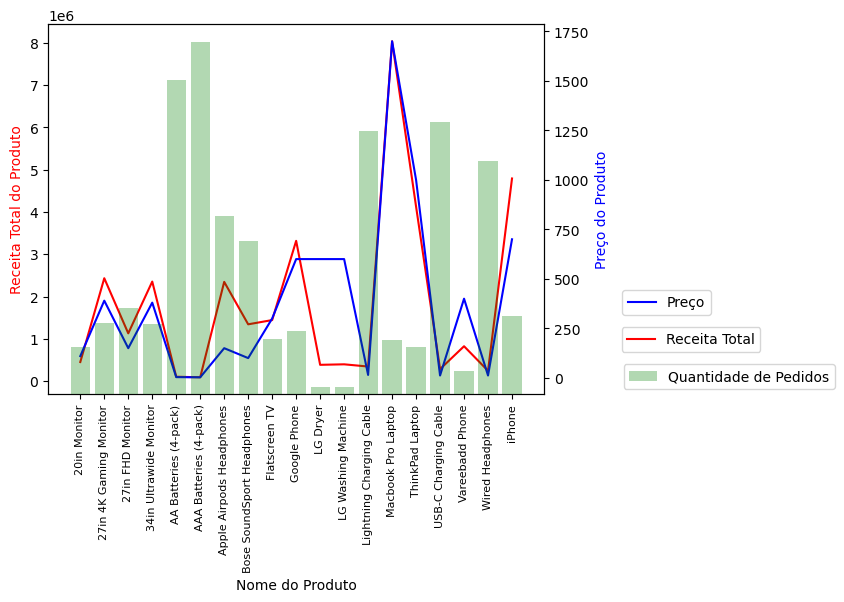

In [70]:
# Preço de cada produto
prices = df_sales.groupby('Product')['Price Each'].mean()

# Soma da quantidade de pedidos por produtos
product_quantity = df_sales.groupby('Product')['Quantity Ordered'].sum() 

# Receita total de cada produto.
product_sales = df_sales.groupby('Product')['Sales'].sum() 

# Plotando um gráfico que informa a quantidade de pedidos por produtos e a receita total de cada produto
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# ax1 - Receita total
ax1.plot(product_sales.index, product_sales, 'r-', label='Receita Total')

ax1.set_xlabel('Nome do Produto')
ax1.set_ylabel('Receita Total do Produto', color='r')
ax1.set_xticklabels(product_quantity.index, rotation='vertical', size=8)

# ax2 - Preço
ax2.plot(prices.index, prices, 'b-', label='Preço')

ax2.set_ylabel('Preço do Produto', color='b')

# ax3 - Quantidade de pedidos
ax3.bar(product_quantity.index, product_quantity, color='g', alpha=0.3, label='Quantidade de Pedidos')

ax3.set_axis_off()

# Legendas
ax1.legend(loc='best', bbox_to_anchor=(0.95, 0., 0.5, 0.2))
ax2.legend(loc='best', bbox_to_anchor=(0.85, 0., 0.5, 0.3))
ax3.legend(loc='best', bbox_to_anchor=(1.1, 0., 0.5, 0.1))

# Mostra o gráfico
plt.show()

### Melhores Produtos

1. **Macbook Pro Laptop**
   - **Quantidade Vendida**: 4,727
   - **Vendas Totais**: 8,035,900.00
   - **Preço**: 1,700.00
   - **Justificativa**: Alta receita e uma quantidade de vendas considerável, indicando uma boa aceitação e disposição dos consumidores em pagar um preço elevado.

2. **iPhone**
   - **Quantidade Vendida**: 6,847
   - **Vendas Totais**: 4,792,900.00 
   - **Preço**: 700.00
   - **Justificativa**: Gera uma receita alta, com um grande volume de vendas, indicando forte demanda, satisfação do cliente e disposição dos consumidores em pagar um preço elevado em comparação a outras marcas de celulares.

3. **Apple Airpods Headphones**
   - **Quantidade Vendida**: 15,657
   - **Vendas Totais**: 2,348,550.00
   - **Preço**: 150.00
   - **Justificativa**: Com destaque na grande quantidade de pedidos e receita total elevada, sugerindo uma forte demanda, posição no mercado e uma boa percepção de valor pelos consumidores.

4. **27in 4K Gaming Monitor**
   - **Quantidade Vendida**: 6,243
   - **Vendas Totais**: 2,434,707.57
   - **Preço**: 389.99
   - **Justificativa**: Boa combinação de preço e volume, mostrando uma forte demanda no segmento de monitores.

### Piores Produtos

1. **LG Washing Machine**
   - **Quantidade Vendida**: 666
   - **Vendas Totais**: 399,600.00
   - **Preço**: 600.00
   - **Justificativa**: Baixa quantidade de vendas, resultando em receita inferior em comparação com outros produtos, o que pode indicar insatisfação, forte concorrência ou uma má percepção de valor pelos consumidores.

2. **LG Dryer**
   - **Quantidade Vendida**: 646
   - **Vendas Totais**: 387,600.00
   - **Preço**: 600.00
   - **Justificativa**: Semelhante à lavadora, baixa quantidade de vendas e receita, o que sugere que este produto não está atraindo muitos consumidores.

3. **Vareebadd Phone**
   - **Quantidade Vendida:** 2,067
   - **Vendas Totais**: 826,800.00
   - **Preço**: 400.00
   - **Justificativa**: Mesmo com um preço baixo com relação a outras marcas de celulares como o iPhone e o Google Phone, a quantidade de vendas e a receita também são inferiores, o que pode indicar uma má posição no mercado, forte concorrência ou insatisfação dos clientes com a marca.

4. **Wired Headphones**
   - **Quantidade Vendida**: 20,553
   - **Vendas Totais**: 246,430.47
   - **Preço**: 11.99
   - **Justificativa**: Embora o número de pedidos possa ser elevado, a receita total é baixa em comparação com outros produtos da mesma categoria, como o Apple Airpods Headphones e o Bose SoundSport Headphones. Isso sugere que, apesar de uma venda volumosa, o preço baixo impede que gere lucro significativo, refletindo uma percepção de baixo valor.

# Conclusão

Os produtos considerados bons apresentam uma combinação de alta receita e quantidade elevada de vendas, indicando boa aceitação no mercado e uma percepção positiva do consumidor. Podemos considerar esses produtos de alto valor com uma forte lealdade à marca, o que indica que os consumidores estão dispostos a investir em itens que consideram de alta qualidade.

Por outro lado, os produtos que apresentaram um preço alto e com baixa quantidade de pedidos, refletiram em uma receita total relativamente baixa. Isso pode ser devido a fatores como baixa taxa de satisfação do cliente ou uma percepção negativa sobre a qualidade ou valor dos produtos. Além disso, eles podem enfrentar concorrência significativa de marcas com melhor reputação, o que pode impactar negativamente suas vendas. Podemos citar também outros produtos como, o Wired Headphones que possue uma quantidade de pedidos elevadas,  mas que embora sejam comprados, não geram um retorno financeiro significativo.